In [3]:
pip install memory-profiler matplotlib

In [4]:
# helpers.py
import time
from typing import Callable, Any, List
from memory_profiler import memory_usage

def time_function(fn: Callable[..., Any], *args, repeats: int = 3, **kwargs) -> float:
    """Measure average execution time (seconds) of fn called repeats times."""
    durations = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(*args, **kwargs)
        end = time.perf_counter()
        durations.append(end - start)
    return sum(durations) / len(durations)

def peak_memory_used(fn: Callable[..., Any], *args, interval: float = 0.05, max_iterations: int = 1, **kwargs) -> float:
    """Return peak memory (MiB) used when running fn(*args, **kwargs)."""
    mem_usage = memory_usage((fn, args, kwargs), interval=interval, max_iterations=max_iterations)
    return max(mem_usage) - min(mem_usage)


In [5]:
# utils.py
import random
from typing import List

def generate_random_array(n: int, seed: int = 30, low: int = -1000, high: int = 1000) -> List[int]:
    """Generate random list of length n using given seed and bounds."""
    random.seed(seed)
    return [random.randint(low, high) for _ in range(n)]

def is_sorted(arr: List[int]) -> bool:
    """Return True if arr is non-decreasing."""
    return all(arr[i] <= arr[i+1] for i in range(len(arr)-1))


In [7]:
# profile_fib_recursive_example.py
import matplotlib.pyplot as plt

# Use the helper functions: time_function, peak_memory_used
# and fibonacci_recursive from previous blocks.

def profile_fib_recursive(ns = [12, 15, 22, 29], repeats=1):
    times = []
    memories = []
    for n in ns:
        t = time_function(fibonacci_recursive, n, repeats=repeats)
        m = peak_memory_used(fibonacci_recursive, n)
        times.append(t)
        memories.append(m)
        print(f"n={n} -> time={t:.6f}s, peak memory={m:.6f} MiB")

    # simple plot (execution time)
    plt.figure(figsize=(6,4))
    plt.plot(ns, times, marker='o', linestyle='-', label='Execution Time')
    plt.xlabel('n (input size)')
    plt.ylabel('Time (seconds)')
    plt.title('Naive Recursive Fibonacci: Time Complexity')
    plt.grid(True)
    plt.legend()
    plt.show()

    # memory plot
    plt.figure(figsize=(6,4))
    plt.plot(ns, memories, marker='s', linestyle='--', label='Memory Usage')
    plt.xlabel('n (input size)')
    plt.ylabel('Memory (MiB)')
    plt.title('Naive Recursive Fibonacci: Memory Usage')
    plt.grid(True)
    plt.legend()
    plt.show()

# call
# profile_fib_recursive()


In [8]:
# fibonacci_dp.py
def fibonacci_dp(n: int) -> int:
    """Compute nth Fibonacci using space-optimized DP. Time: O(n), Space: O(1)."""
    if n < 0:
        raise ValueError("Input must be a non-negative integer")
    if n == 0:
        return 0
    a, b = 0, 1
    for _ in range(1, n):
        a, b = b, a + b
    return b

# quick test
if __name__ == "__main__":
    for i in range(10):
        print(i, fibonacci_dp(i))


0 0
1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34


In [9]:
# sorting_algos.py
from typing import List

def insertion_sort(arr: List[int]) -> List[int]:
    a = arr[:]  # copy to avoid in-place modifying input
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

def bubble_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        if not swapped:
            break
    return a

def selection_sort(arr: List[int]) -> List[int]:
    a = arr[:]
    n = len(a)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr[:]
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    # merge
    i = j = 0
    merged = []
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i]); i += 1
        else:
            merged.append(right[j]); j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr[:]
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)


In [10]:
# search_algos.py
from typing import List, Optional

def linear_search(arr: List[int], target: int) -> Optional[int]:
    for i, v in enumerate(arr):
        if v == target:
            return i
    return None

def binary_search(arr: List[int], target: int) -> Optional[int]:
    """Assumes arr is sorted."""
    lo, hi = 0, len(arr) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            lo = mid + 1
        else:
            hi = mid - 1
    return None


In [11]:
# benchmark_sorts.py
import matplotlib.pyplot as plt

ALGORITHMS = {
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort
}

def benchmark_sorts(sizes = [100, 500, 1000, 2000], seed: int = 30):
    results = {name: [] for name in ALGORITHMS}
    for n in sizes:
        arr = generate_random_array(n, seed=seed)
        for name, fn in ALGORITHMS.items():
            # measure average time once (or repeats small)
            t = time_function(fn, arr, repeats=1)
            results[name].append(t)
            print(f"{name} n={n} time={t:.6f}s")
    # plot comparison
    plt.figure(figsize=(8,5))
    for name, times in results.items():
        plt.plot(sizes, times, marker='o', label=name)
    plt.xlabel("Input size (n)")
    plt.ylabel("Time (seconds)")
    plt.title("Sorting Algorithms Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()

# call benchmark_sorts() to run


Fibonacci (recursive) n=10: 55
Fibonacci (dp) n=100: 354224848179261915075
Original: [73, 4, 54, 61, 73, 1, 26, 59, 62, 35, 83, 20, 4, 66, 62, 41, 9, 31, 95, 46]
Insertion sort: [1, 4, 4, 9, 20, 26, 31, 35, 41, 46, 54, 59, 61, 62, 62, 66, 73, 73, 83, 95]
Bubble sort: [1, 4, 4, 9, 20, 26, 31, 35, 41, 46, 54, 59, 61, 62, 62, 66, 73, 73, 83, 95]
Merge sort: [1, 4, 4, 9, 20, 26, 31, 35, 41, 46, 54, 59, 61, 62, 62, 66, 73, 73, 83, 95]
Quick sort: [1, 4, 4, 9, 20, 26, 31, 35, 41, 46, 54, 59, 61, 62, 62, 66, 73, 73, 83, 95]
Insertion Sort n=100 time=0.000195s
Bubble Sort n=100 time=0.000373s
Selection Sort n=100 time=0.000234s
Merge Sort n=100 time=0.000154s
Quick Sort n=100 time=0.000118s
Insertion Sort n=500 time=0.006603s
Bubble Sort n=500 time=0.011181s
Selection Sort n=500 time=0.006856s
Merge Sort n=500 time=0.001059s
Quick Sort n=500 time=0.000713s
Insertion Sort n=1000 time=0.021871s
Bubble Sort n=1000 time=0.071283s
Selection Sort n=1000 time=0.086327s
Merge Sort n=1000 time=0.019416

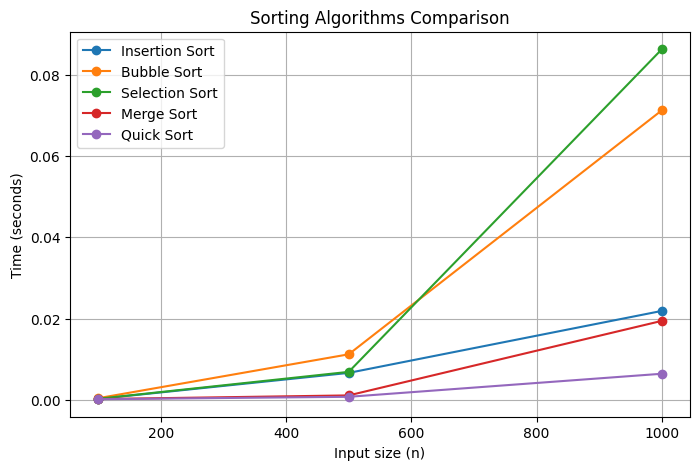

In [12]:
if __name__ == "__main__":
    # Small demonstrations
    print("Fibonacci (recursive) n=10:", fibonacci_recursive(10))
    print("Fibonacci (dp) n=100:", fibonacci_dp(100))

    arr = generate_random_array(20, seed=10, low=0, high=100)
    print("Original:", arr)
    print("Insertion sort:", insertion_sort(arr))
    print("Bubble sort:", bubble_sort(arr))
    print("Merge sort:", merge_sort(arr))
    print("Quick sort:", quick_sort(arr))

    # benchmark small
    benchmark_sorts(sizes=[100, 500, 1000], seed=42)
